In [1]:
# Import dependencies
import math
import operator
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

   year           gdp
0  1985  1.409469e+10
1  1986  2.633662e+10
2  1987  3.665811e+10
3  1988  2.542381e+10
4  1989  6.293305e+09


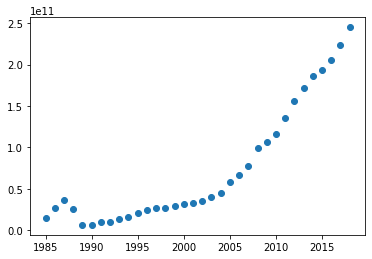

In [2]:
# Import data
path = '/Users/thainam/Documents/GitHub/grey-model/data/gdp.csv'
data = pd.read_csv(path)

# Check and print out data
print(data.head())
plt.scatter(data.year, data.gdp)
plt.show()

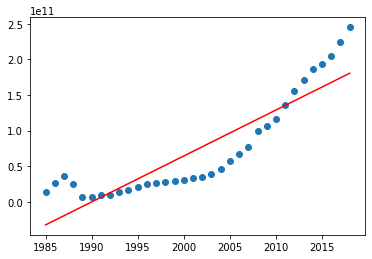

Root mean squared error score: 3.2413447865495786
R^2 score: 0.7927048281992577


In [3]:
# Linear Regression
x = data.year[:, np.newaxis]
y = data.gdp[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color = 'red')
plt.show()

# Check scores
rmse = math.sqrt(mse(y, y_pred))
print("Root mean squared error score: " + str(rmse / 10**10))
r2 = r2_score(y, y_pred)
print("R^2 score: " + str(r2))

Root mean squared error score: 0.7123437017518545
R^2 score: 0.9899880676963835


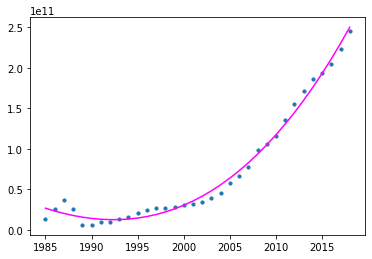

In [4]:
# Polynomial Regression
polynomial_features = PolynomialFeatures(degree = 4)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = math.sqrt(mse(y,y_poly_pred))
print("Root mean squared error score: " + str(rmse / 10**10))
r2 = r2_score(y,y_poly_pred)
print("R^2 score: " + str(r2))


plt.scatter(x, y, s=10)

# Sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='magenta')
plt.show()